In [1]:
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import backend as K
import activation_plot as aplt
%matplotlib inline

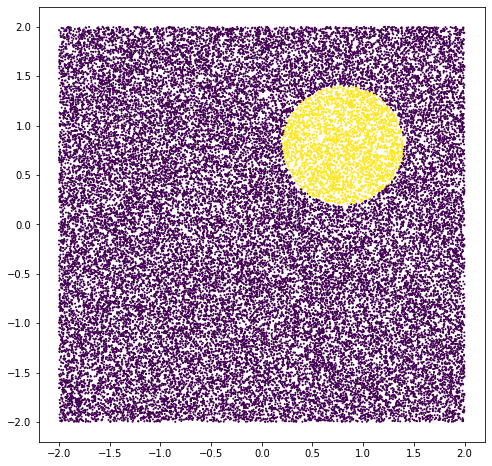

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from tensorflow.keras.utils import to_categorical
%matplotlib inline

#Prepare data
N=40000
L=4
X = L*np.random.rand(N,2) 
X[:,0] = X[:,0]-L/2
X[:,1] = X[:,1]-L/2

Y = np.zeros(N)

for i in range(N):
    if (X[i,0]-0.8)**2+(X[i,1]-0.8)**2<0.36:
        Y[i]=1
    else:
        Y[i]=0
        
plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:, 1], s=1, c=Y)
plt.show()

data = X
labels = to_categorical(Y)

In [3]:
hid_layer_units = [4,3]
model = aplt.prepare_model(hid_layer_units,n_category = len(labels[0]))
tf.keras.models.save_model(model,'model_initial')

In [21]:
model.fit(data, labels, epochs=10,verbose=1,batch_size=32)

Train on 40000 samples
Epoch 1/10
40000/40000 [==============================] - 5s 136us/sample - loss: 0.2525 - categorical_accuracy: 0.9305
Epoch 2/10
40000/40000 [==============================] - 1s 33us/sample - loss: 0.2525 - categorical_accuracy: 0.9305
Epoch 3/10
40000/40000 [==============================] - 2s 40us/sample - loss: 0.2525 - categorical_accuracy: 0.9305
Epoch 4/10
40000/40000 [==============================] - 2s 50us/sample - loss: 0.2525 - categorical_accuracy: 0.9305
Epoch 5/10
40000/40000 [==============================] - 2s 50us/sample - loss: 0.2525 - categorical_accuracy: 0.9305
Epoch 6/10
40000/40000 [==============================] - 2s 49us/sample - loss: 0.2525 - categorical_accuracy: 0.9305
Epoch 7/10
40000/40000 [==============================] - 2s 50us/sample - loss: 0.2525 - categorical_accuracy: 0.9305
Epoch 8/10
40000/40000 [==============================] - 2s 46us/sample - loss: 0.2525 - categorical_accuracy: 0.9305
Epoch 9/10
40000/40000 [

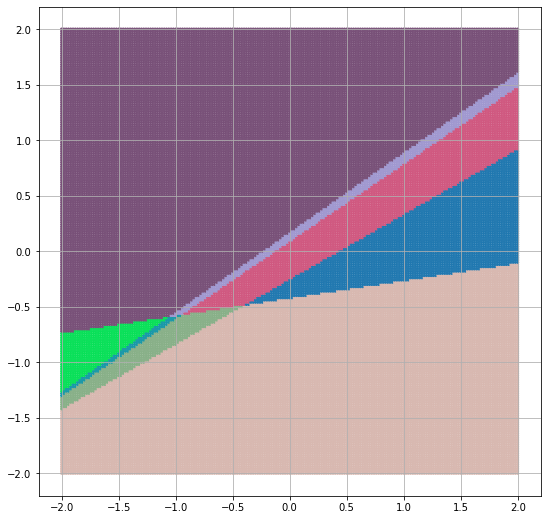

In [17]:
X_test = aplt.data_grid(grid=200,square_len=2)
colors = aplt.get_color(X_test)

layer_output_functions=aplt.get_layer_output_functions(model)

activations = aplt.get_data_activation(X_test,layer_output_functions)
data_activation_color = aplt.get_data_color(activations,colors)

plt.figure(figsize=(9, 9))
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o',s=4, c=data_activation_color)
#plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_test, s=1,alpha = 0.8)
plt.grid()
plt.show()
plt.close()

In [18]:
A,b = model.layers[0].get_weights()

In [23]:
b

array([ 0.11207285, -0.08754739, -0.14601317, -0.06482403], dtype=float32)

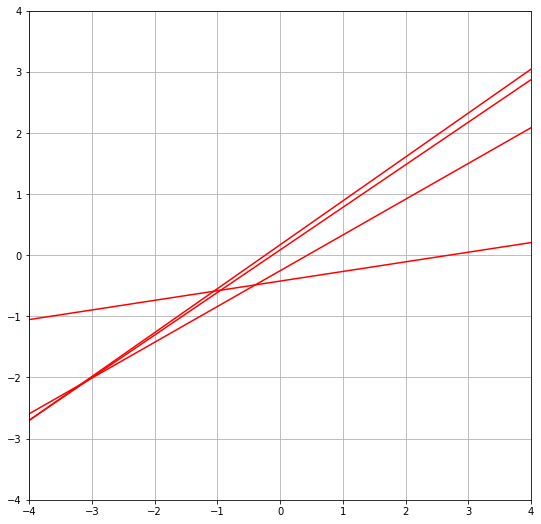

In [20]:
A = np.transpose(A)

L = 4
x = np.linspace(-L,L,100)
Y = []
for i in range(hid_layer_units[0]):
    y = -A[i,0]/A[i,1]*x+-b[i]/A[i,1]
    Y.append(y)

plt.figure(figsize=(9, 9))
for i in range(hid_layer_units[0]):
    plt.plot(x, Y[i], '-r', label='x1,y1')
plt.xlim(-L,L)
plt.ylim(-L,L)
plt.grid()
plt.show()

In [45]:
#model_copy = tf.keras.models.load_model('model_initial')
model_copy.layers[0].set_weights([model_copy.layers[0].get_weights()[0],0.5*model_copy.layers[0].get_weights()[1]])

In [49]:
model_copy.layers[0].get_weights()

[array([[-0.02288632,  0.02933478, -0.75266   , -1.4942083 ],
        [ 0.22971494, -0.24636197,  1.8877959 , -4.3875003 ]],
       dtype=float32),
 array([-0.67864555, -2.3111513 , -1.6144918 ,  2.7467105 ], dtype=float32)]

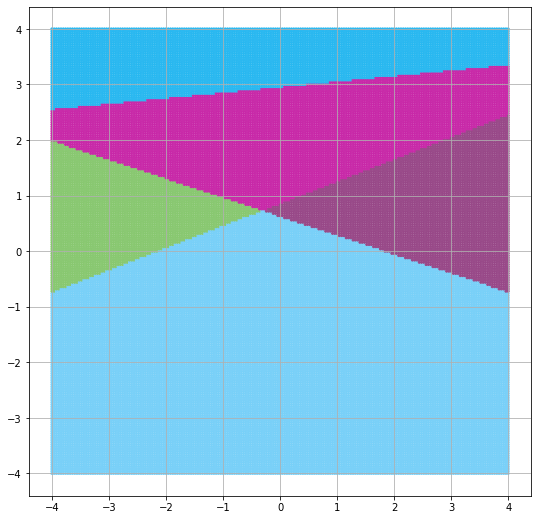

In [50]:
#model_copy = tf.keras.models.load_model('model_initial')

X_test = aplt.data_grid(grid=200,square_len=4)
colors = aplt.get_color(X_test)

layer_output_functions = aplt.get_layer_output_functions(model_copy)

activations = aplt.get_data_activation(X_test,layer_output_functions)
data_activation_color = aplt.get_data_color(activations,colors)

plt.figure(figsize=(9, 9))
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o',s=4, c=data_activation_color)
#plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_test, s=1,alpha = 0.8)
plt.grid()
plt.show()
plt.close()

In [48]:
model_copy.fit(data, labels, epochs=6,verbose=1,batch_size=32)

Train on 40000 samples
Epoch 1/6
40000/40000 [==============================] - 2s 52us/sample - loss: 0.1572 - categorical_accuracy: 0.9305
Epoch 2/6
40000/40000 [==============================] - 2s 47us/sample - loss: 0.1342 - categorical_accuracy: 0.9305
Epoch 3/6
40000/40000 [==============================] - 2s 52us/sample - loss: 0.1280 - categorical_accuracy: 0.9305
Epoch 4/6
40000/40000 [==============================] - 2s 52us/sample - loss: 0.1258 - categorical_accuracy: 0.9305
Epoch 5/6
40000/40000 [==============================] - 2s 53us/sample - loss: 0.1246 - categorical_accuracy: 0.9305
Epoch 6/6
40000/40000 [==============================] - 2s 52us/sample - loss: 0.1238 - categorical_accuracy: 0.9305


# Add BN

In [161]:
# import BatchNormalization
from tensorflow.keras.layers import BatchNormalization

# instantiate model
model_bn = Sequential()

# we can think of this chunk as the input layer
model_bn.add(BatchNormalization(input_shape=(2,)))
model_bn.add(Dense(hid_layer_units[0], input_dim=2, bias_initializer='random_uniform'))
model_bn.add(BatchNormalization())
model_bn.add(Activation('relu'))


# we can think of this chunk as the hidden layer    
model_bn.add(Dense(hid_layer_units[1], bias_initializer='random_uniform'))
model_bn.add(BatchNormalization())
model_bn.add(Activation('relu'))

# we can think of this chunk as the output layer
model_bn.add(Dense(len(labels[0]), bias_initializer='random_uniform'))
model_bn.add(BatchNormalization())
model_bn.add(Activation('softmax'))

# setting up the optimization of our weights 
model_bn.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=tf.keras.losses.categorical_crossentropy,
                  metrics=[tf.keras.metrics.categorical_accuracy])

model_bn.fit(data, labels, epochs=10,verbose=1,batch_size=32)

Train on 40000 samples
Epoch 1/10
40000/40000 [==============================] - 3s 69us/sample - loss: 0.3287 - categorical_accuracy: 0.9115
Epoch 2/10
40000/40000 [==============================] - 2s 60us/sample - loss: 0.1580 - categorical_accuracy: 0.9292
Epoch 3/10
40000/40000 [==============================] - 2s 56us/sample - loss: 0.0839 - categorical_accuracy: 0.9542
Epoch 4/10
40000/40000 [==============================] - 2s 62us/sample - loss: 0.0408 - categorical_accuracy: 0.9864
Epoch 5/10
40000/40000 [==============================] - 2s 53us/sample - loss: 0.0252 - categorical_accuracy: 0.9902
Epoch 6/10
40000/40000 [==============================] - 2s 51us/sample - loss: 0.0198 - categorical_accuracy: 0.9921
Epoch 7/10
40000/40000 [==============================] - 3s 63us/sample - loss: 0.0165 - categorical_accuracy: 0.9931
Epoch 8/10
40000/40000 [==============================] - 2s 53us/sample - loss: 0.0151 - categorical_accuracy: 0.9937
Epoch 9/10
40000/40000 [=

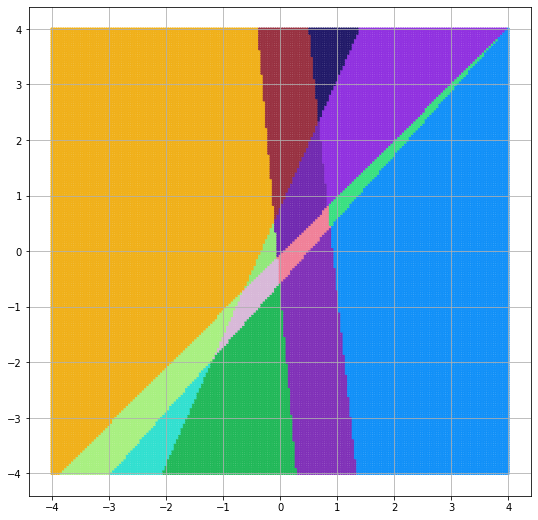

In [162]:
X_test = aplt.data_grid(grid=200,square_len=4)
colors = aplt.get_color(X_test)

bn_layer_output_functions = []
bn_layer_output_functions.append(K.function(model_bn.layers[0].input,model_bn.layers[3].output))
bn_layer_output_functions.append(K.function(model_bn.layers[0].input,model_bn.layers[6].output))

bn_activations = aplt.get_data_activation(X_test,bn_layer_output_functions)
bn_data_activation_color = aplt.get_data_color(bn_activations,colors)

plt.figure(figsize=(9, 9))
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o',s=4, c=bn_data_activation_color)
#plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_test, s=1,alpha = 0.8)
plt.grid()
plt.show()
plt.close()

In [85]:
model_bn.fit(data, labels, epochs=20,verbose=1,batch_size=32)

Train on 40000 samples
Epoch 1/20
40000/40000 [==============================] - 3s 63us/sample - loss: 0.5439 - categorical_accuracy: 0.8063
Epoch 2/20
40000/40000 [==============================] - 2s 58us/sample - loss: 0.2338 - categorical_accuracy: 0.8856
Epoch 3/20
40000/40000 [==============================] - 2s 62us/sample - loss: 0.1542 - categorical_accuracy: 0.9371
Epoch 4/20
40000/40000 [==============================] - 3s 63us/sample - loss: 0.1190 - categorical_accuracy: 0.9548
Epoch 5/20
40000/40000 [==============================] - 2s 62us/sample - loss: 0.1004 - categorical_accuracy: 0.9611
Epoch 6/20
40000/40000 [==============================] - 2s 62us/sample - loss: 0.0888 - categorical_accuracy: 0.9660
Epoch 7/20
40000/40000 [==============================] - 3s 64us/sample - loss: 0.0816 - categorical_accuracy: 0.9679
Epoch 8/20
40000/40000 [==============================] - 2s 58us/sample - loss: 0.0757 - categorical_accuracy: 0.9696
Epoch 9/20
40000/40000 [=

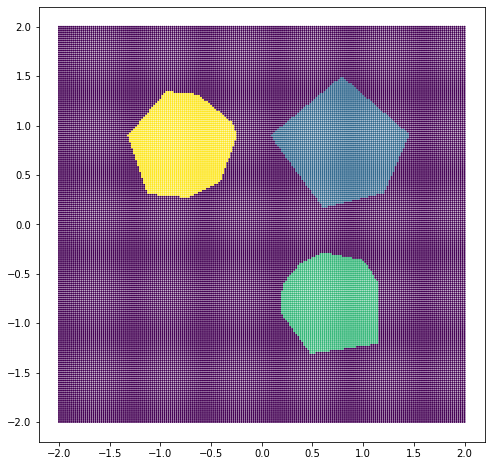

In [90]:
#test
import numpy as np

X_test = aplt.data_grid(200,2)
Y_test = model_bn.predict(X_test)
Y_test = np.argmax(Y_test, axis=1)

plt.figure(figsize=(8, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_test, s=1,alpha=1)
plt.show()
plt.close()

In [170]:
model_bn.layers[6].get_weights()

[]